In [ ]:
import pandas as pd
import numpy as np
import random

random.seed(10)
cusno = pd.Series(np.arange(1, 1001))
gender = pd.Series(np.random.choice([0,1],1000))
age = pd.Series(np.random.uniform(10,81,1000).astype(int))
region = pd.Series(np.random.uniform(1,11,1000).astype(int))

customer_df = pd.concat([cusno, gender, age, region],axis=1)
customer_df.columns = ['cusno', 'gender', 'age', 'region']

#트랜잭션 데이터 프레임
t_no = pd.Series(np.arange(1, 10001))

date_list = list(pd.date_range('2020-01-01','2021-12-31',freq='D'))

#date ok
date = pd.Series(np.random.choice(date_list, size=10000))
#요일
day = date.apply(lambda x: x.weekday())
day = day.replace(list(range(7)), ['월','화','수','목','금','토','일'])
# cusno ok
cusno = pd.Series(np.random.randint(1,1001,size=10000))
#품목 ok
product = pd.Series(np.random.choice([10,20,30],10000))
#가격 ok
price = pd.Series(np.random.uniform(1000, 50001, 10000)).round(2)
#수량 ok
quantity = pd.Series(np.random.uniform(1,101, 10000)).astype(int)
#시간 ok
time = pd.Series(np.random.uniform(1,25, 10000)).astype(int)
#amount ok
amount=pd.Series(price*quantity)

tran_df = pd.concat([t_no,date,day,time,cusno,product,price,quantity,amount],axis=1)
tran_df.columns = ['t_no','date','day','time','cusno','product','price','quantity','amount']

print(pd.merge( tran_df, customer_df, on='cusno'))
df = pd.merge( tran_df, customer_df, on='cusno')

def adjust_quantity(row):
    if 1 <= row['time'] < 7:
        row['quantity'] *= 0.5
    return row

df = df.apply(adjust_quantity, axis=1)

def age_adjust_quantity(row):
    if  row['age'] >= 60:
        row['quantity'] *= 0.5
    return row

df = df.apply(age_adjust_quantity, axis=1)

def woman_adjust_quantity(row):
    if  row['gender'] == 1:
        row['quantity'] *= 1.2
    return row

df = df.apply(woman_adjust_quantity, axis=1)

def chidren_adjust_quantity(row):
    if  row['age'] <= 16:
        row['quantity'] *= 0.3
    return row

df = df.apply(chidren_adjust_quantity, axis=1)

def top_quantity(row, threshold):
    if row['amount'] > threshold:
        row['quantity'] *= 2
    return row

threshold = df['amount'].quantile(0.90)

df = df.apply(lambda row: top_quantity(row, threshold), axis=1)

df['amount'] = df['price'] * df['quantity']
df

      t_no       date day  time  cusno  product     price  quantity  \
0        1 2021-05-25   화    12    895       30  34805.68        22   
1     1831 2021-06-02   수    20    895       30  27258.92        65   
2     3196 2021-03-22   월    23    895       10  33634.02        25   
3     4095 2021-04-24   토     7    895       10  10024.92        37   
4     5433 2020-06-27   토    12    895       10  38559.71        56   
...    ...        ...  ..   ...    ...      ...       ...       ...   
9995  8436 2020-01-15   수     1    947       20  46240.30         9   
9996  6850 2021-05-28   금    12    258       30  30818.80        43   
9997  7811 2020-01-10   금    22    258       10  12815.75         4   
9998  7909 2020-07-27   월     7    258       20  39655.43        86   
9999  8750 2020-07-17   금    13    258       20  45107.91        29   

          amount  gender  age  region  
0      765724.96       0   19       4  
1     1771829.80       0   19       4  
2      840850.50       0   

,t_no,date,day,time,cusno,product,price,quantity,amount,gender,age,region
0,1,2021-05-25,화,12,895,30,34805.68,22.00,765724.960,0,19,4
1,1831,2021-06-02,수,20,895,30,27258.92,65.00,1771829.800,0,19,4
2,3196,2021-03-22,월,23,895,10,33634.02,25.00,840850.500,0,19,4
3,4095,2021-04-24,토,7,895,10,10024.92,37.00,370922.040,0,19,4
4,5433,2020-06-27,토,12,895,10,38559.71,56.00,2159343.760,0,19,4
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,8436,2020-01-15,수,1,947,20,46240.30,1.35,62424.405,0,10,5
9996,6850,2021-05-28,금,12,258,30,30818.80,21.50,662604.200,0,60,1
9997,7811,2020-01-10,금,22,258,10,12815.75,2.00,25631.500,0,60,1
9998,7909,2020-07-27,월,7,258,20,39655.43,86.00,3410366.980,0,60,1


In [ ]:
data = df

In [ ]:
# Recalculate mean and standard deviation for the new data
price_mean, price_std = data['price'].mean()+14000, data['price'].std()*2/3
quantity_mean, quantity_std = data['quantity'].mean()+70, data['quantity'].std()/2

# Generate new values following a normal distribution based on the mean and std
new_price = np.random.normal(price_mean, price_std, len(data))
# new_price = np.maximum(new_price, data['price'].mean())  # Replace negative values with 0

new_quantity = np.random.normal(quantity_mean, quantity_std, len(data))
# new_quantity = np.maximum(new_quantity, data['quantity'].mean())  # Replace negative values with 0

# Update the 'amount' column based on the new 'price' and 'quantity'
new_amount = new_price * new_quantity

# Replace the old values with the new ones
data['price'] = new_price
data['quantity'] = new_quantity
data['amount'] = new_amount


data.head()
print(data.price.describe())
print(data.quantity.describe())

count    10000.000000
mean     39624.221150
std       9442.137442
min       3833.617243
25%      33283.635613
50%      39699.692050
75%      45979.505755
max      75562.328397
Name: price, dtype: float64
count    10000.000000
mean       115.798748
std         21.830690
min         36.846809
25%        100.462833
50%        115.766134
75%        130.322992
max        186.626709
Name: quantity, dtype: float64


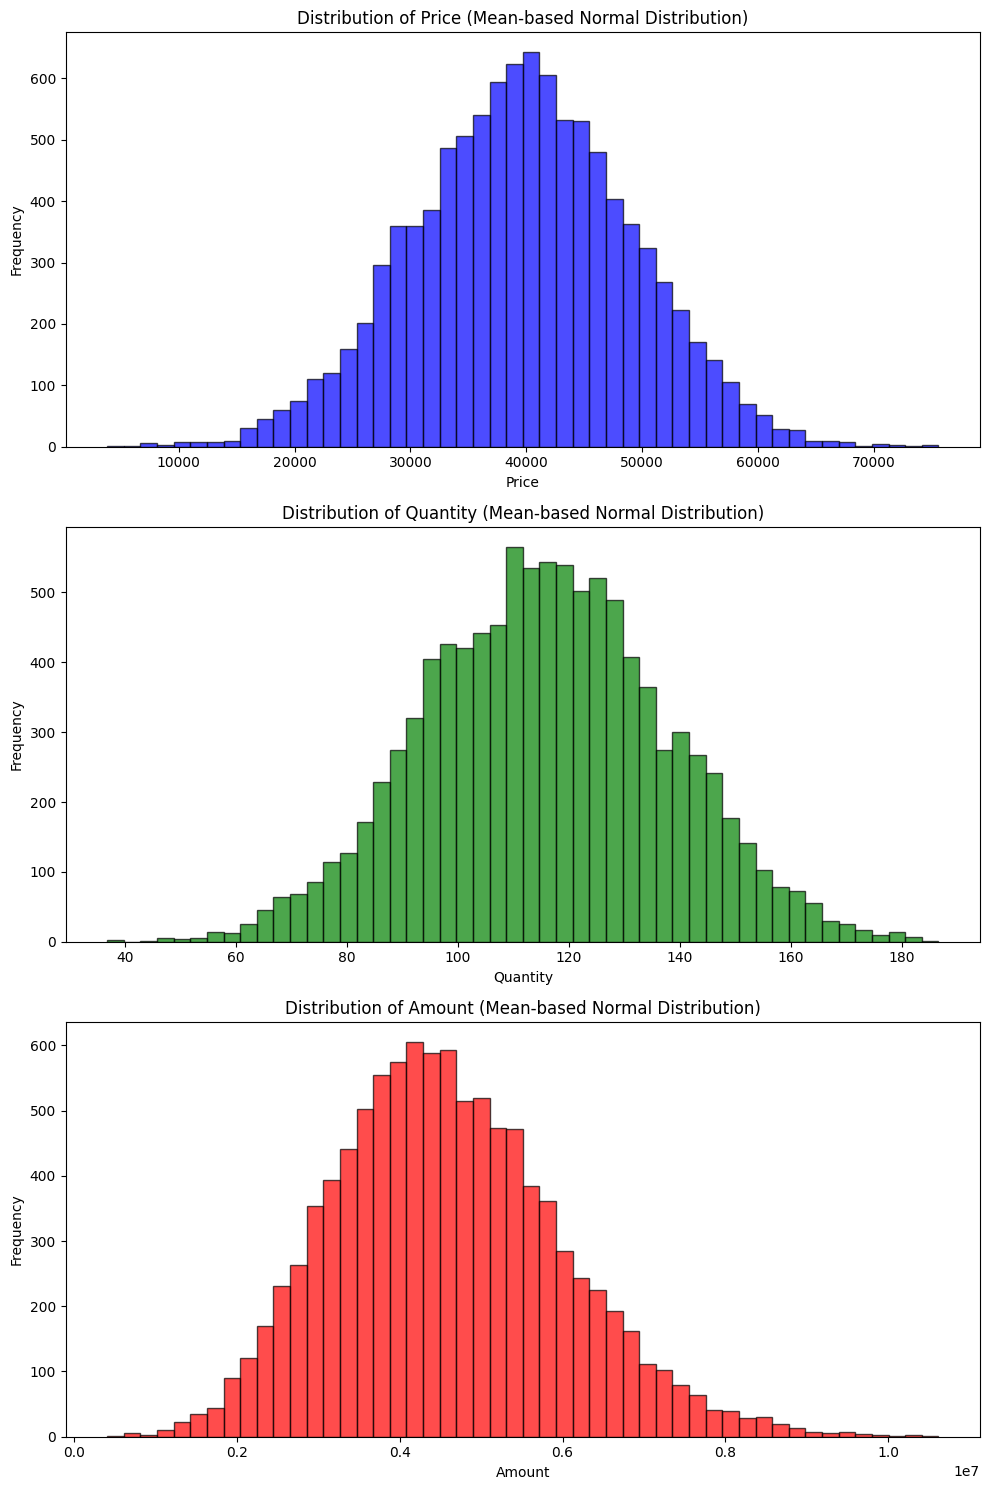

In [ ]:
# Plot the distribution of price, quantity, and amount after ensuring non-negative values and normal distribution

import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# Plot for price
axes[0].hist(data['price'], bins=50, alpha=0.7, color='blue', edgecolor='black')
axes[0].set_title('Distribution of Price (Mean-based Normal Distribution)')
axes[0].set_xlabel('Price')
axes[0].set_ylabel('Frequency')

# Plot for quantity
axes[1].hist(data['quantity'], bins=50, alpha=0.7, color='green', edgecolor='black')
axes[1].set_title('Distribution of Quantity (Mean-based Normal Distribution)')
axes[1].set_xlabel('Quantity')
axes[1].set_ylabel('Frequency')

# Plot for amount
axes[2].hist(data['amount'], bins=50, alpha=0.7, color='red', edgecolor='black')
axes[2].set_title('Distribution of Amount (Mean-based Normal Distribution)')
axes[2].set_xlabel('Amount')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


In [ ]:
data.head()

,t_no,date,day,time,cusno,product,price,quantity,amount,gender,age,region
0,1,2021-05-25,화,12,895,30,40329.109232,124.348889,5.014880e+06,0,19,4
1,1831,2021-06-02,수,20,895,30,32215.839414,95.693839,3.082857e+06,0,19,4
2,3196,2021-03-22,월,23,895,10,46205.089222,93.931838,4.340129e+06,0,19,4
3,4095,2021-04-24,토,7,895,10,41491.723110,147.468572,6.118725e+06,0,19,4
4,5433,2020-06-27,토,12,895,10,33326.845320,87.567608,2.918352e+06,0,19,4


In [ ]:
data.to_csv('data_noramlize.csv', index=False)

<Axes: xlabel='gender', ylabel='amount'>

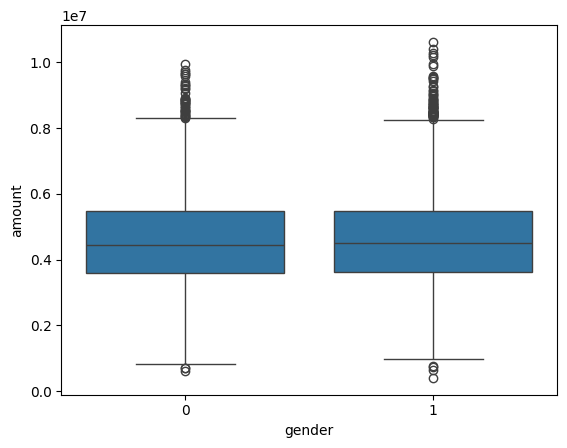

In [ ]:
#성별에 따른 구매 구액의 분포
#gender amount distributino box plot
import seaborn as sns
sns.boxplot(x='gender', y='amount', data=data)


<Figure size 1000x600 with 0 Axes>

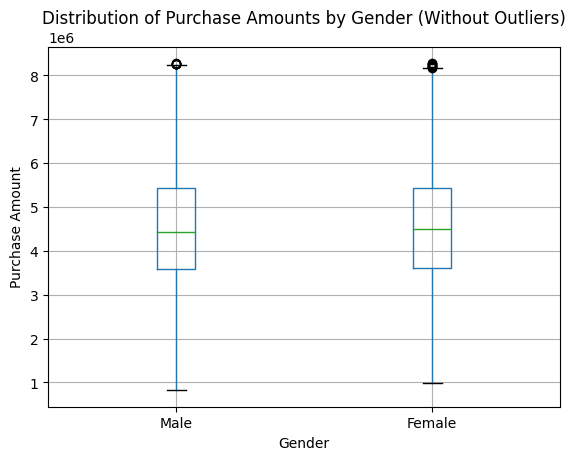

In [ ]:
# Calculate the IQR for the 'amount' column
Q1 = data['amount'].quantile(0.25)
Q3 = data['amount'].quantile(0.75)
IQR = Q3 - Q1

# Define the bounds for filtering out outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
filtered_data = data[(data['amount'] >= lower_bound) & (data['amount'] <= upper_bound)]

# Create a boxplot to show the distribution of purchase amounts by gender after removing outliers
plt.figure(figsize=(10, 6))
filtered_data.boxplot(column='amount', by='gender')
plt.title('Distribution of Purchase Amounts by Gender (Without Outliers)')
plt.suptitle('')
plt.xlabel('Gender')
plt.ylabel('Purchase Amount')
plt.xticks([1, 2], ['Male', 'Female'])  # Assuming 0 = Male, 1 = Female
plt.show()


In [ ]:
data.describe()

,t_no,date,time,cusno,product,price,quantity,amount,gender,age,region
count,10000.00000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000
mean,5000.50000,2021-01-01 16:44:41.280000,12.454800,506.380400,19.882000,39624.221150,115.798748,4.588413e+06,0.534700,44.731400,5.444500
min,1.00000,2020-01-01 00:00:00,1.000000,1.000000,10.000000,3833.617243,36.846809,4.051319e+05,0.000000,10.000000,1.000000
25%,2500.75000,2020-06-29 00:00:00,6.000000,258.750000,10.000000,33283.635613,100.462833,3.601631e+06,0.000000,27.000000,3.000000
50%,5000.50000,2021-01-05 00:00:00,12.000000,512.000000,20.000000,39699.692050,115.766134,4.484813e+06,1.000000,45.000000,6.000000
75%,7500.25000,2021-07-04 00:00:00,18.000000,760.000000,30.000000,45979.505755,130.322992,5.477836e+06,1.000000,62.000000,8.000000
max,10000.00000,2021-12-31 00:00:00,24.000000,1000.000000,30.000000,75562.328397,186.626709,1.061813e+07,1.000000,80.000000,10.000000
std,2886.89568,NaN,6.939076,289.278668,8.226351,9442.137442,21.830690,1.408600e+06,0.498819,20.233606,2.877038


In [ ]:
import pandas as pd
from sklearn.ensemble import IsolationForest


# Isolation Forest 모델 훈련 및 이상치 감지
iso_forest = IsolationForest(contamination=0.05, random_state=42)
data['outlier'] = iso_forest.fit_predict(data[['amount']])

# 이상치 제거
filtered_data = data[data['outlier'] == 1]

# 이상치가 제거된 데이터 저장
filtered_data = filtered_data.drop(columns=['outlier'])  # 'outlier' 컬럼 제거

print("이상치가 제거된 데이터가 저장되었습니다.")
data = filtered_data
data.info()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


이상치가 제거된 데이터가 저장되었습니다.
<class 'pandas.core.frame.DataFrame'>
Index: 9501 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   t_no      9501 non-null   int64         
 1   date      9501 non-null   datetime64[ns]
 2   day       9501 non-null   object        
 3   time      9501 non-null   int64         
 4   cusno     9501 non-null   int64         
 5   product   9501 non-null   int64         
 6   price     9501 non-null   float64       
 7   quantity  9501 non-null   float64       
 8   amount    9501 non-null   float64       
 9   gender    9501 non-null   int64         
 10  age       9501 non-null   int64         
 11  region    9501 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(7), object(1)
memory usage: 964.9+ KB


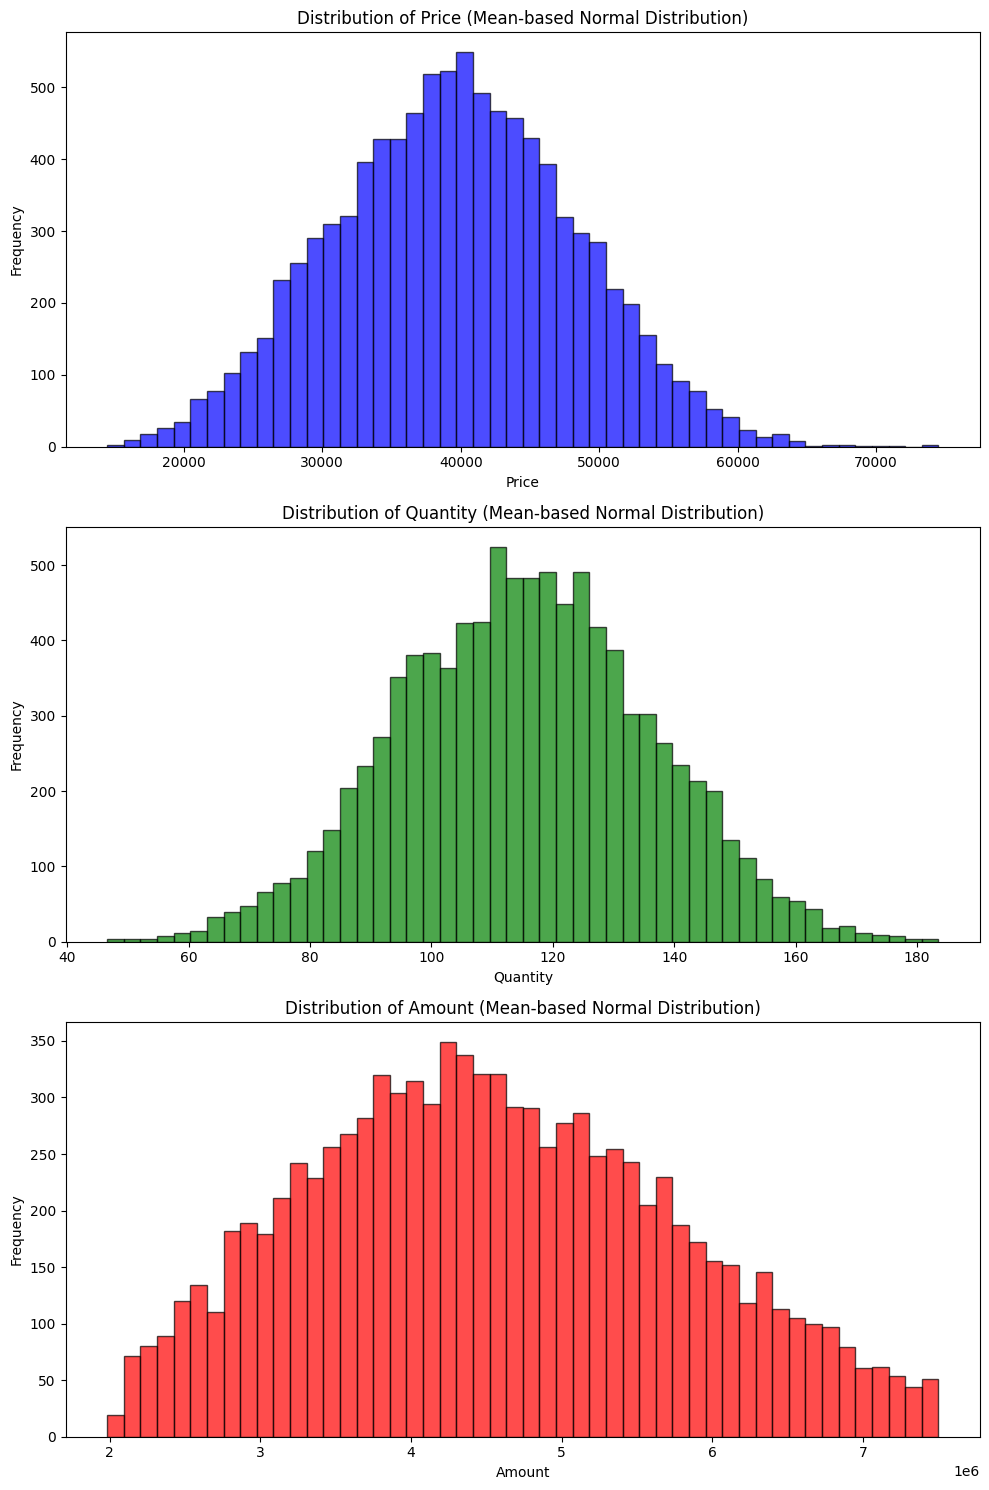

In [ ]:
# Plot the distribution of price, quantity, and amount after ensuring non-negative values and normal distribution

import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# Plot for price
axes[0].hist(data['price'], bins=50, alpha=0.7, color='blue', edgecolor='black')
axes[0].set_title('Distribution of Price (Mean-based Normal Distribution)')
axes[0].set_xlabel('Price')
axes[0].set_ylabel('Frequency')

# Plot for quantity
axes[1].hist(data['quantity'], bins=50, alpha=0.7, color='green', edgecolor='black')
axes[1].set_title('Distribution of Quantity (Mean-based Normal Distribution)')
axes[1].set_xlabel('Quantity')
axes[1].set_ylabel('Frequency')

# Plot for amount
axes[2].hist(data['amount'], bins=50, alpha=0.7, color='red', edgecolor='black')
axes[2].set_title('Distribution of Amount (Mean-based Normal Distribution)')
axes[2].set_xlabel('Amount')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


In [ ]:
data.to_csv('data_rev.csv', index=False)

In [ ]:
df = data

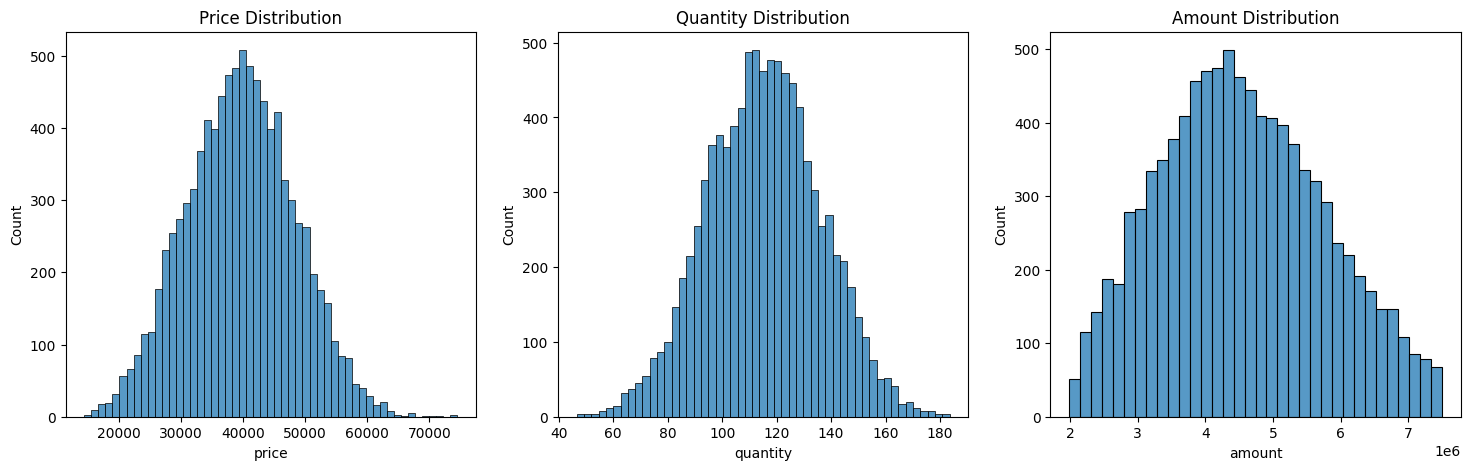

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, f_oneway

# 가격, 구매 수량, 총 구매 금액 분포 시각화
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(df['price'], ax=axes[0])
axes[0].set_title('Price Distribution')

sns.histplot(df['quantity'], ax=axes[1])
axes[1].set_title('Quantity Distribution')

sns.histplot(df['amount'], ax=axes[2])
axes[2].set_title('Amount Distribution')

plt.show()

### Q1. data_rev.csv를 불러와서 추가적으로 의미있는 3개의 인사이트를 반영한 후 탐색적 분석을 통하여 그 내용을 통계적 시각적으로 도출하고 인사이트가 반영되었는지 여부를 기술하시고 data_analysis.csv로 저장하세요.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving data_rev.csv to data_rev.csv


In [ ]:
import pandas as pd
data = pd.read_csv('data_rev.csv')

In [ ]:
#제품별 판매량 및 매출분석 연도별

data['date'] = pd.to_datetime(data['date'])
data['year'] = data['date'].dt.year
product_sales = data.groupby(['year', 'product'])[['quantity', 'amount']].sum().reset_index()
product_sales


,year,product,quantity,amount
0,2020,10,186317.478160,7.312567e+09
1,2020,20,171273.379631,6.746636e+09
2,2020,30,184420.532464,7.336131e+09
3,2021,10,192108.112049,7.604621e+09
4,2021,20,180611.790823,7.072900e+09
5,2021,30,181176.703770,7.100291e+09


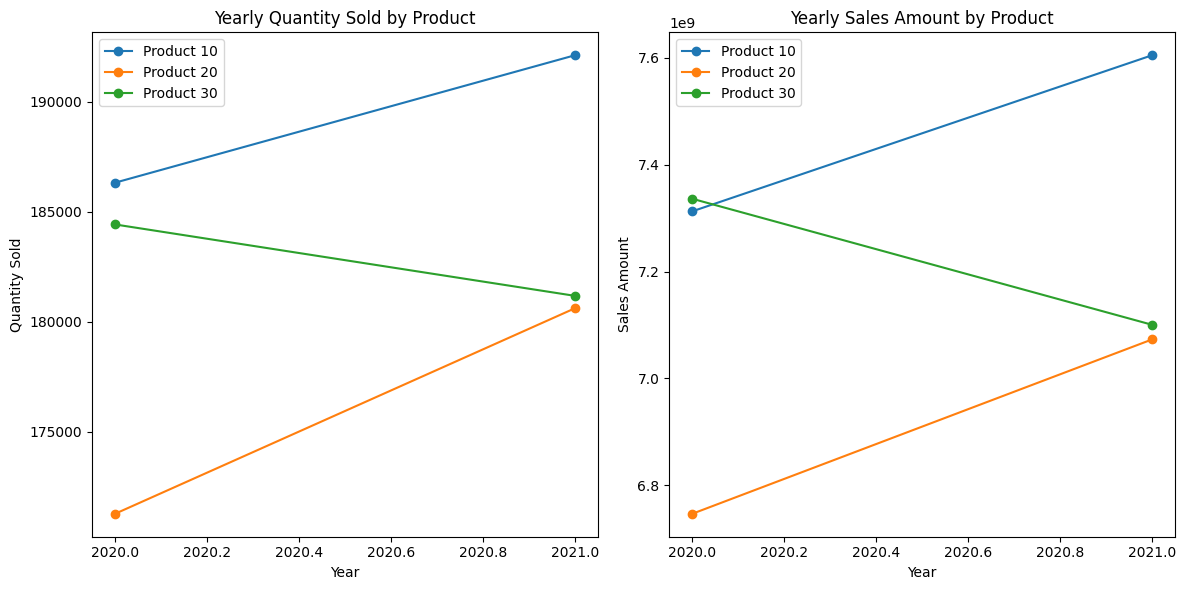

In [ ]:
# Ensure that the 'year' column is added correctly to the data
data['date'] = pd.to_datetime(data['date'])
data['year'] = data['date'].dt.year

# Group the data by year and product, then sum quantity and amount
product_sales = data.groupby(['year', 'product'])[['quantity', 'amount']].sum().reset_index()

# Plotting the data
plt.figure(figsize=(12, 6))

# Plot for quantity
plt.subplot(1, 2, 1)
for product in product_sales['product'].unique():
    subset = product_sales[product_sales['product'] == product]
    plt.plot(subset['year'], subset['quantity'], marker='o', label=f'Product {product}')
plt.title('Yearly Quantity Sold by Product')
plt.xlabel('Year')
plt.ylabel('Quantity Sold')
plt.legend()

# Plot for amount
plt.subplot(1, 2, 2)
for product in product_sales['product'].unique():
    subset = product_sales[product_sales['product'] == product]
    plt.plot(subset['year'], subset['amount'], marker='o', label=f'Product {product}')
plt.title('Yearly Sales Amount by Product')
plt.xlabel('Year')
plt.ylabel('Sales Amount')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
#월별 판매 추이 분석

# Ensure the 'month' column is correctly added to the data
data['month'] = data['date'].dt.month

# Group the data by month and product, then sum quantity and amount
monthly_sales = data.groupby(['month', 'product'])[['quantity', 'amount']].sum().reset_index()

monthly_sales

,month,product,quantity,amount
0,1,10,30068.232877,1.191731e+09
1,1,20,28900.946628,1.154451e+09
2,1,30,37792.354409,1.457314e+09
3,2,10,27485.124640,1.081739e+09
4,2,20,27086.726321,1.096257e+09
5,2,30,28176.579857,1.121904e+09
6,3,10,33109.168420,1.275228e+09
7,3,20,28136.576618,1.098275e+09
8,3,30,31934.185808,1.278168e+09
9,4,10,31093.988901,1.211375e+09


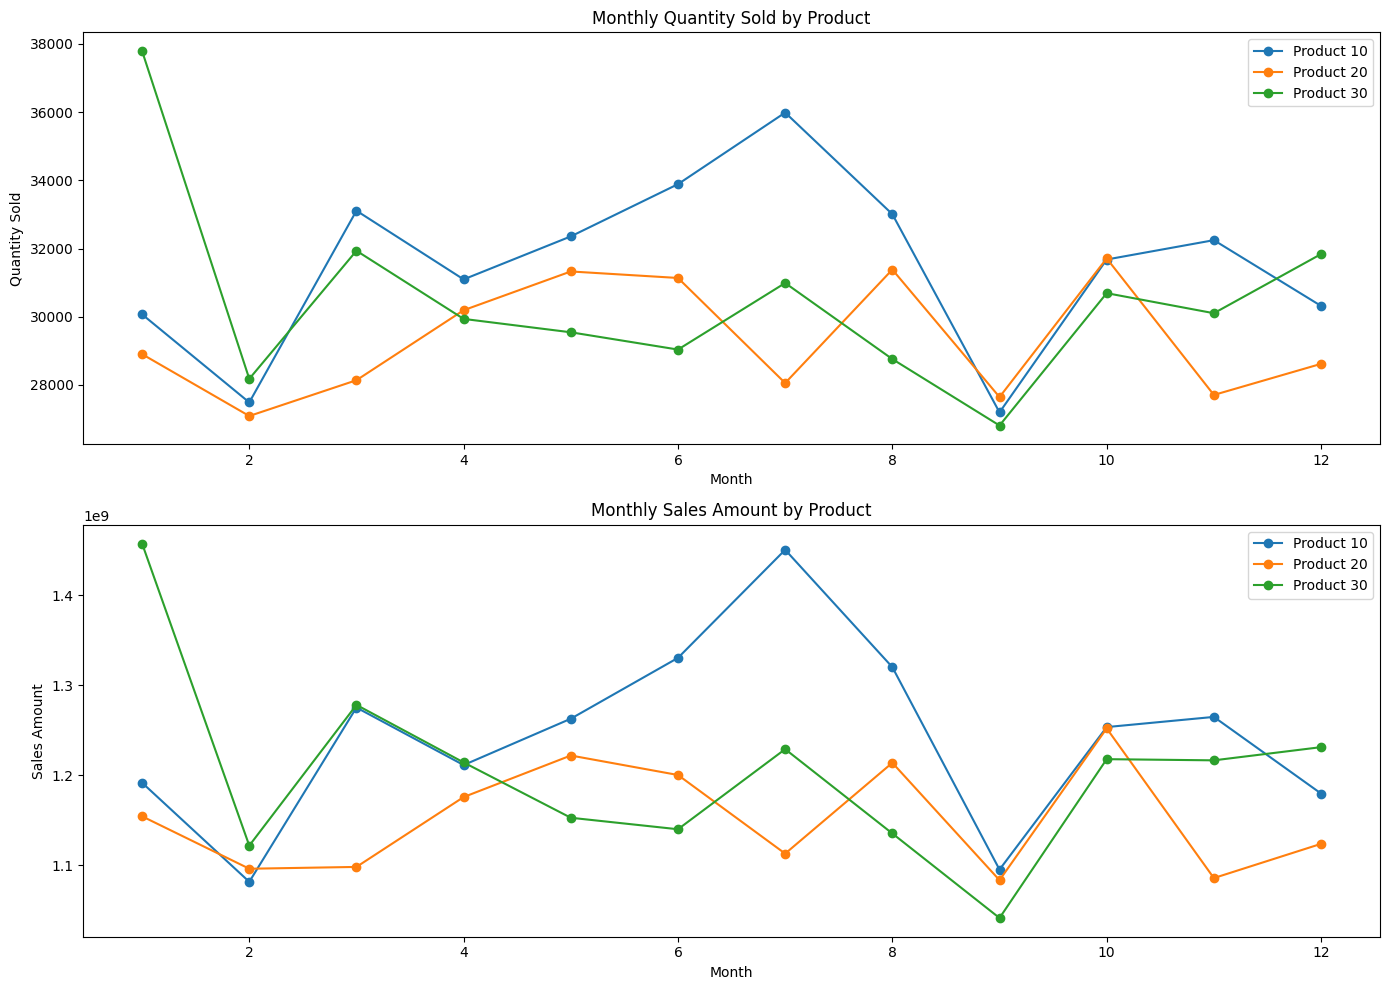

In [ ]:
# Plotting the data
plt.figure(figsize=(14, 10))

# Plot for monthly quantity sold by product
plt.subplot(2, 1, 1)
for product in monthly_sales['product'].unique():
    subset = monthly_sales[monthly_sales['product'] == product]
    plt.plot(subset['month'], subset['quantity'], marker='o', label=f'Product {product}')
plt.title('Monthly Quantity Sold by Product')
plt.xlabel('Month')
plt.ylabel('Quantity Sold')
plt.legend()

# Plot for monthly sales amount by product
plt.subplot(2, 1, 2)
for product in monthly_sales['product'].unique():
    subset = monthly_sales[monthly_sales['product'] == product]
    plt.plot(subset['month'], subset['amount'], marker='o', label=f'Product {product}')
plt.title('Monthly Sales Amount by Product')
plt.xlabel('Month')
plt.ylabel('Sales Amount')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
monthly_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   month     36 non-null     int32  
 1   product   36 non-null     int64  
 2   quantity  36 non-null     float64
 3   amount    36 non-null     float64
dtypes: float64(2), int32(1), int64(1)
memory usage: 1.1 KB


In [ ]:
monthly_sales

,month,product,quantity,amount
0,1,10,30068.232877,1.191731e+09
1,1,20,28900.946628,1.154451e+09
2,1,30,37792.354409,1.457314e+09
3,2,10,27485.124640,1.081739e+09
4,2,20,27086.726321,1.096257e+09
5,2,30,28176.579857,1.121904e+09
6,3,10,33109.168420,1.275228e+09
7,3,20,28136.576618,1.098275e+09
8,3,30,31934.185808,1.278168e+09
9,4,10,31093.988901,1.211375e+09


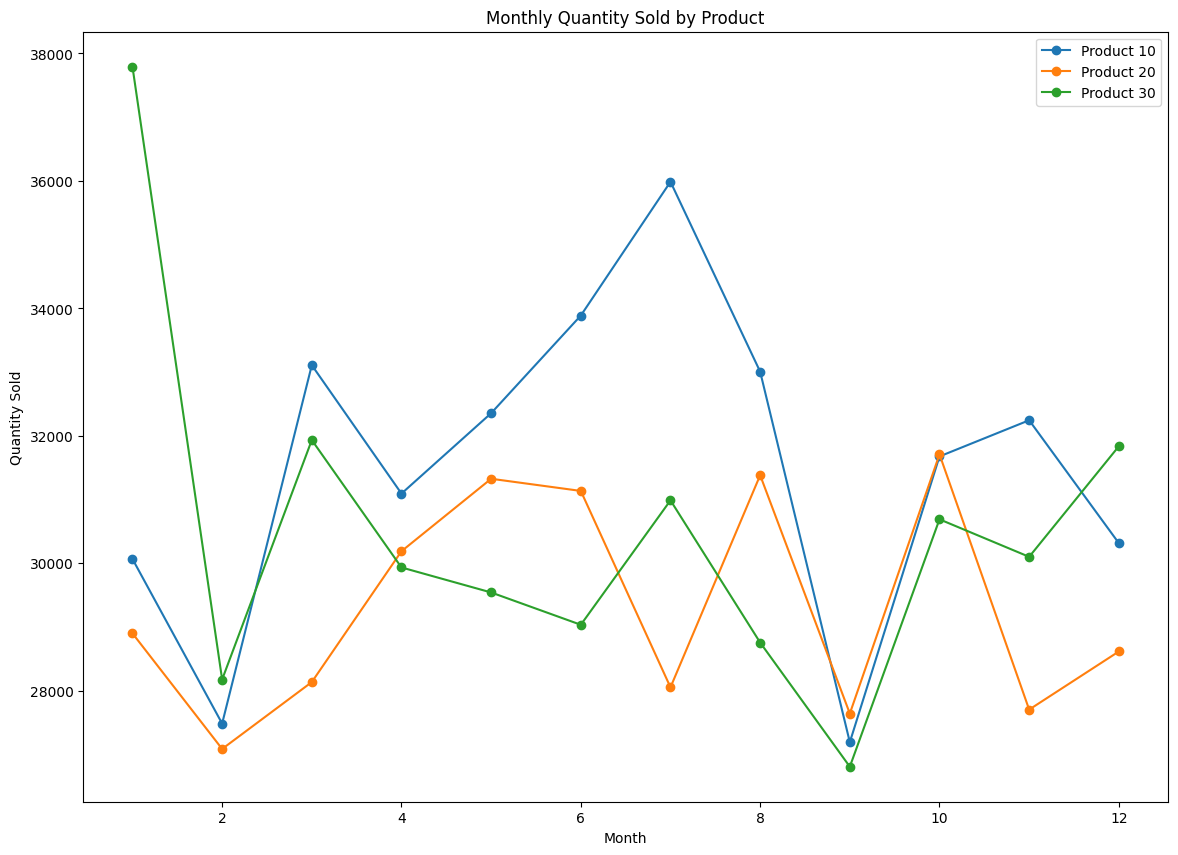

In [ ]:
# Plotting the data
plt.figure(figsize=(14, 10))

for product in monthly_sales['product'].unique():
    subset = monthly_sales[monthly_sales['product'] == product]
    plt.plot(subset['month'], subset['quantity'], marker='o', label=f'Product {product}')
plt.title('Monthly Quantity Sold by Product')
plt.xlabel('Month')
plt.ylabel('Quantity Sold')
plt.legend()


plt.show()


In [ ]:
monthly_sales[monthly_sales['product']==10]['quantity']
monthly_sales.loc[(monthly_sales['month'] == 1) & (monthly_sales['product'] == 10), 'quantity'] = 25000
monthly_sales.loc[(monthly_sales['month'] == 2) & (monthly_sales['product'] == 10), 'quantity'] = 25500
monthly_sales.loc[(monthly_sales['month'] == 3) & (monthly_sales['product'] == 10), 'quantity'] = 26000
monthly_sales.loc[(monthly_sales['month'] == 4) & (monthly_sales['product'] == 10), 'quantity'] = 26500
monthly_sales.loc[(monthly_sales['month'] == 5) & (monthly_sales['product'] == 10), 'quantity'] = 27000
monthly_sales.loc[(monthly_sales['month'] == 6) & (monthly_sales['product'] == 10), 'quantity'] = 29000
monthly_sales.loc[(monthly_sales['month'] == 7) & (monthly_sales['product'] == 10), 'quantity'] = 37000
monthly_sales.loc[(monthly_sales['month'] == 8) & (monthly_sales['product'] == 10), 'quantity'] = 42000
monthly_sales.loc[(monthly_sales['month'] == 9) & (monthly_sales['product'] == 10), 'quantity'] = 35000
monthly_sales.loc[(monthly_sales['month'] == 10) & (monthly_sales['product'] == 10), 'quantity'] = 29000
monthly_sales.loc[(monthly_sales['month'] == 11) & (monthly_sales['product'] == 10), 'quantity'] = 27000
monthly_sales.loc[(monthly_sales['month'] == 12) & (monthly_sales['product'] == 10), 'quantity'] = 24000

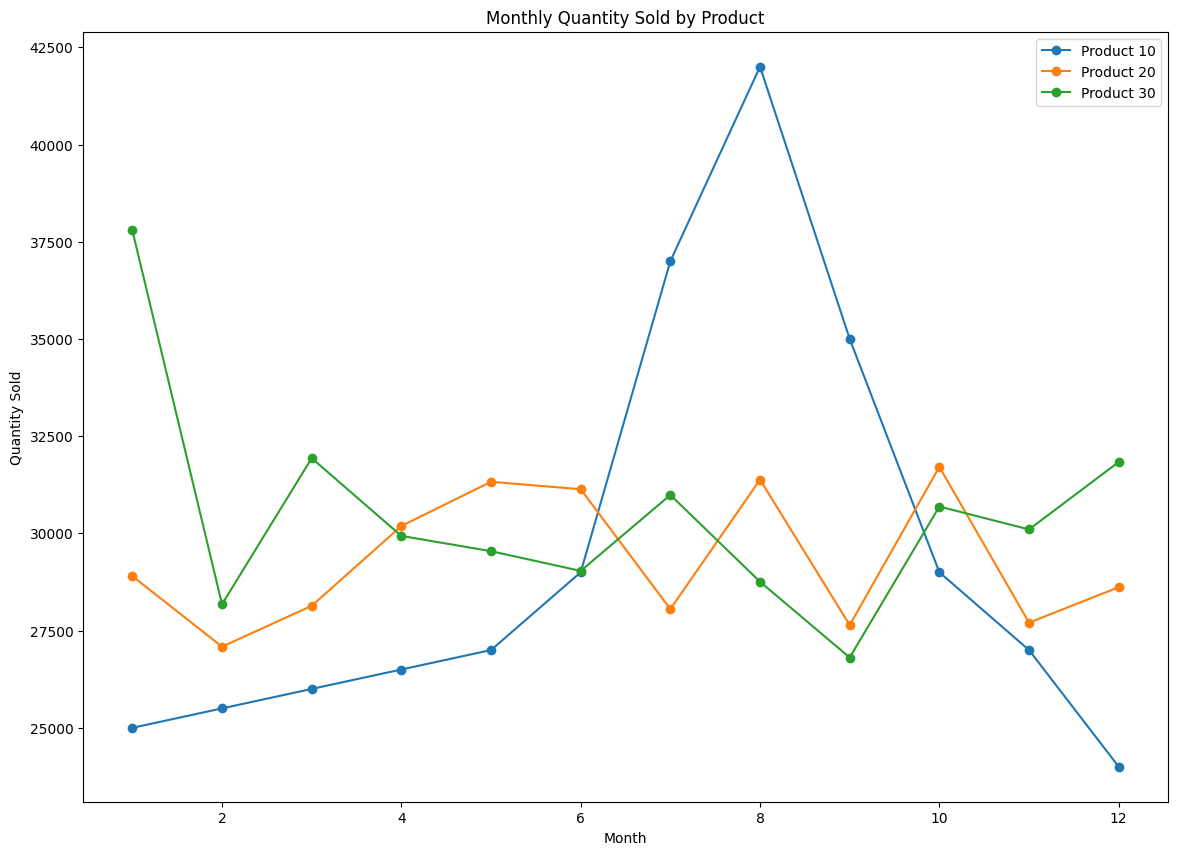

In [ ]:
# Plotting the data
plt.figure(figsize=(14, 10))

# Plot for monthly quantity sold by product
for product in monthly_sales['product'].unique():
    subset = monthly_sales[monthly_sales['product'] == product]
    plt.plot(subset['month'], subset['quantity'], marker='o', label=f'Product {product}')
plt.title('Monthly Quantity Sold by Product')
plt.xlabel('Month')
plt.ylabel('Quantity Sold')
plt.legend()

plt.show()


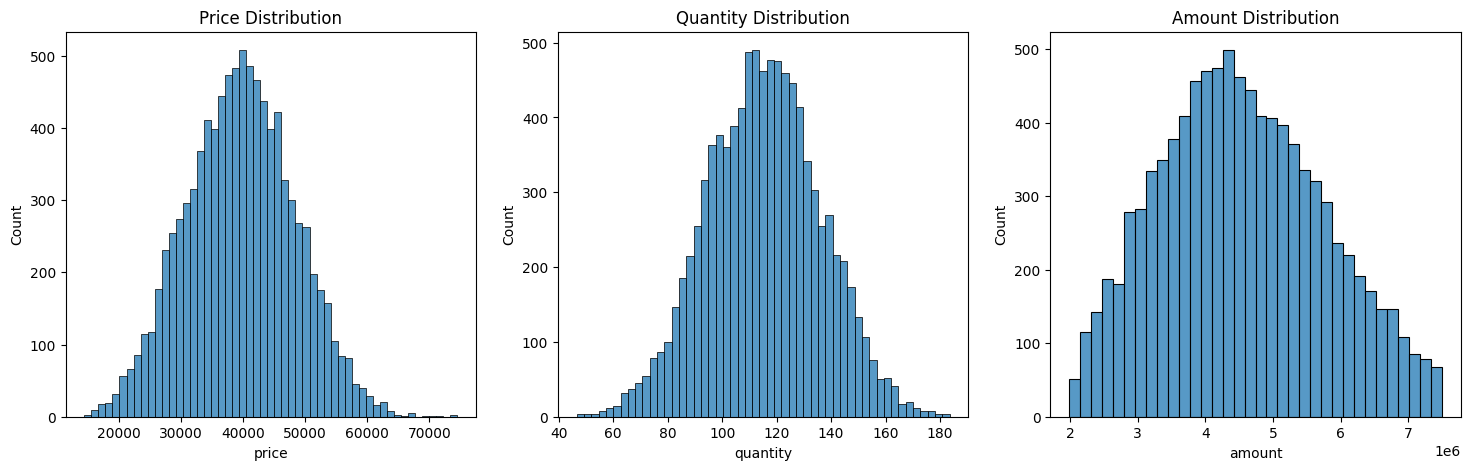

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, f_oneway

df = data
# 가격, 구매 수량, 총 구매 금액 분포 시각화
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(df['price'], ax=axes[0])
axes[0].set_title('Price Distribution')

sns.histplot(df['quantity'], ax=axes[1])
axes[1].set_title('Quantity Distribution')

sns.histplot(df['amount'], ax=axes[2])
axes[2].set_title('Amount Distribution')

plt.show()

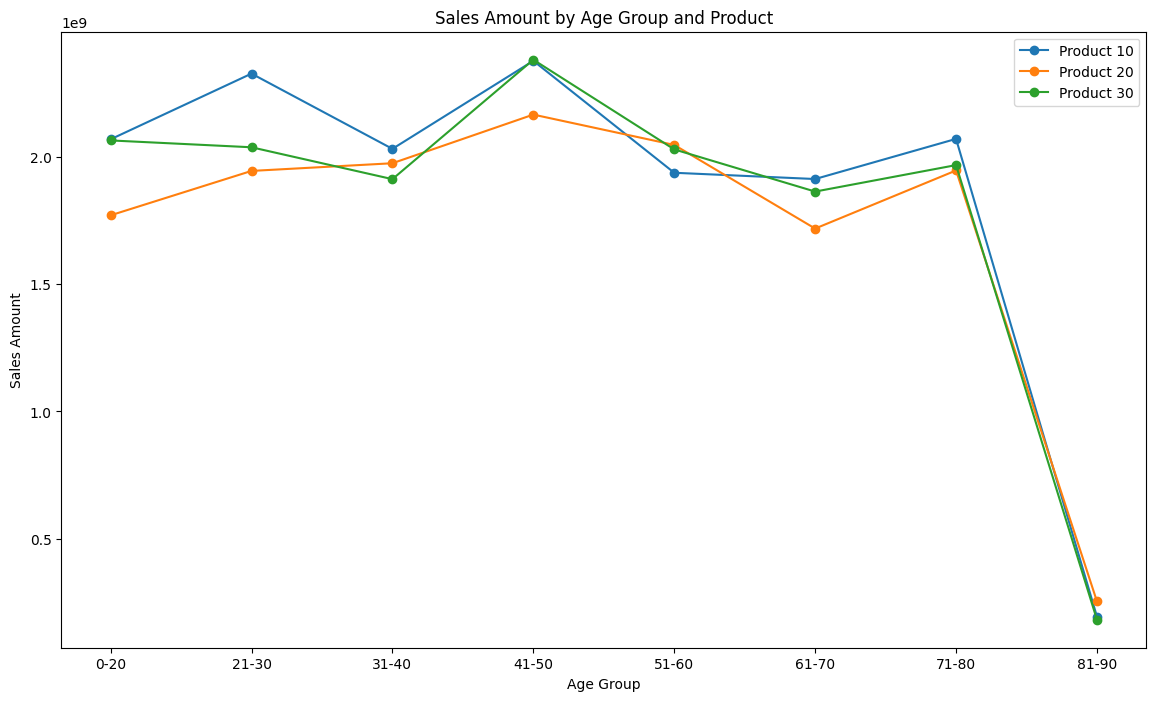

In [ ]:
#
# Define age groups without the 90-100 range
bins = [0, 20, 30, 40, 50, 60, 70, 80, 90]
labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90']

# Add the age group column to the data
data['age_group'] = pd.cut(data['age'], bins=bins, labels=labels, right=False)

# Group by age group and product, then sum the amount
age_group_product_sales = data.groupby(['age_group', 'product'])['amount'].sum().reset_index()


# Plotting the data
plt.figure(figsize=(14, 8))

for product in age_group_product_sales['product'].unique():
    subset = age_group_product_sales[age_group_product_sales['product'] == product]
    plt.plot(subset['age_group'], subset['amount'], marker='o', label=f'Product {product}')

plt.title('Sales Amount by Age Group and Product')
plt.xlabel('Age Group')
plt.ylabel('Sales Amount')
plt.legend()
plt.show()


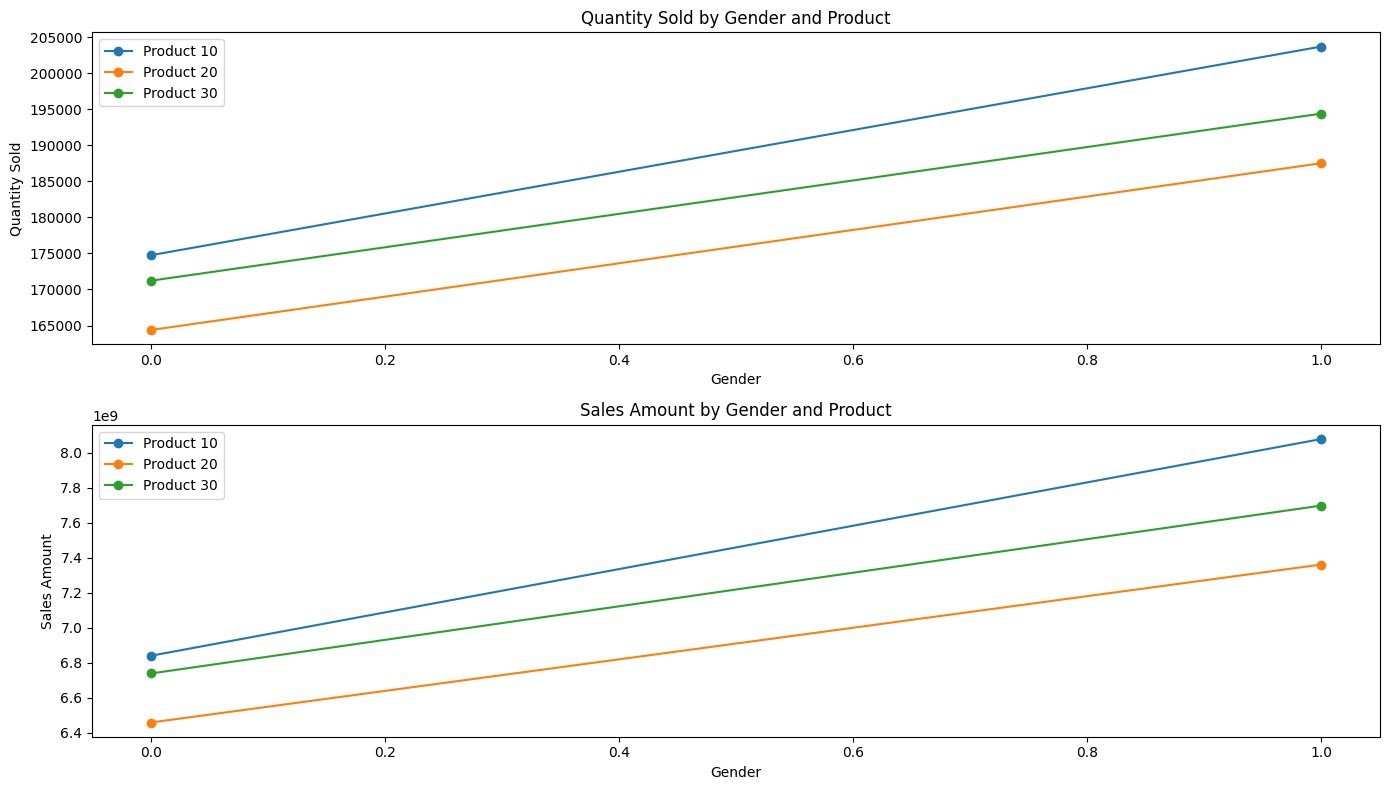

In [ ]:
#성별 구매 패턴 분석

# Group by gender and product, then sum quantity and amount
gender_product_sales = data.groupby(['gender', 'product'])[['quantity', 'amount']].sum().reset_index()

# Plotting the data
plt.figure(figsize=(14, 8))

# Plot for quantity
plt.subplot(2, 1, 1)
for product in gender_product_sales['product'].unique():
    subset = gender_product_sales[gender_product_sales['product'] == product]
    plt.plot(subset['gender'], subset['quantity'], marker='o', label=f'Product {product}')
plt.title('Quantity Sold by Gender and Product')
plt.xlabel('Gender')
plt.ylabel('Quantity Sold')
plt.legend()

# Plot for amount
plt.subplot(2, 1, 2)
for product in gender_product_sales['product'].unique():
    subset = gender_product_sales[gender_product_sales['product'] == product]
    plt.plot(subset['gender'], subset['amount'], marker='o', label=f'Product {product}')
plt.title('Sales Amount by Gender and Product')
plt.xlabel('Gender')
plt.ylabel('Sales Amount')
plt.legend()

plt.tight_layout()
plt.show()


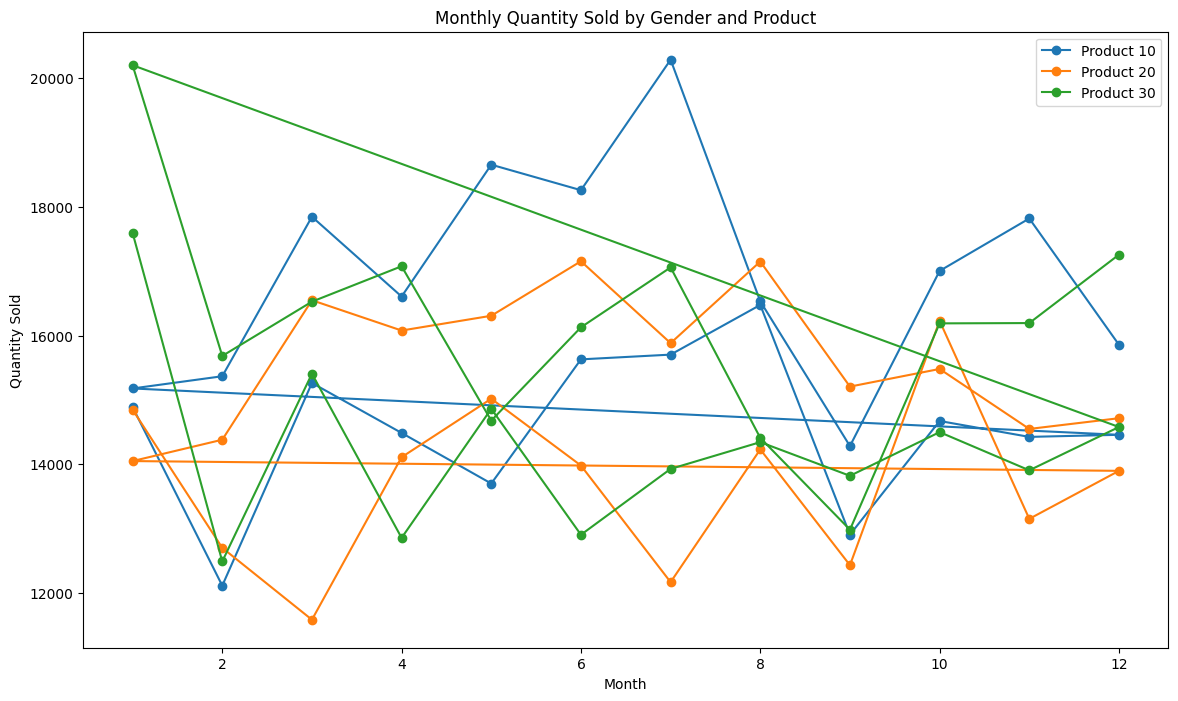

In [ ]:
# Group by gender, month, and product, then sum quantity
gender_month_product_sales = data.groupby(['gender', 'month', 'product'])[['quantity']].sum().reset_index()

# Plotting the data
plt.figure(figsize=(14, 8))

# Plot for each product
for product in gender_month_product_sales['product'].unique():
    subset = gender_month_product_sales[gender_month_product_sales['product'] == product]
    plt.plot(subset['month'], subset['quantity'], marker='o', label=f'Product {product}')

plt.title('Monthly Quantity Sold by Gender and Product')
plt.xlabel('Month')
plt.ylabel('Quantity Sold')
plt.legend()
plt.show()


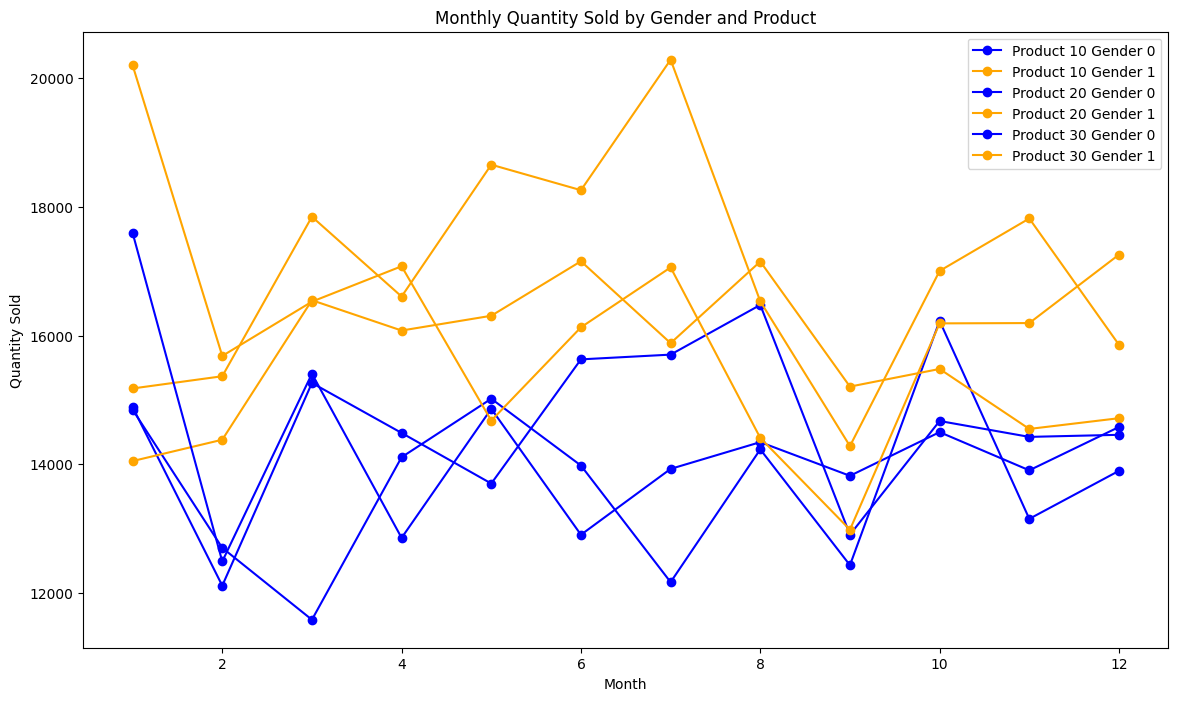

In [ ]:
# Plotting the data with separate colors and legends for gender
plt.figure(figsize=(14, 8))

genders = gender_month_product_sales['gender'].unique()
products = gender_month_product_sales['product'].unique()

colors = {0: 'blue', 1: 'orange'}  # Assuming 0 for male and 1 for female, can be adjusted as per data

# Plot for each product and gender
for product in products:
    for gender in genders:
        subset = gender_month_product_sales[(gender_month_product_sales['product'] == product) &
                                            (gender_month_product_sales['gender'] == gender)]
        plt.plot(subset['month'], subset['quantity'], marker='o', label=f'Product {product} Gender {gender}', color=colors[gender])

plt.title('Monthly Quantity Sold by Gender and Product')
plt.xlabel('Month')
plt.ylabel('Quantity Sold')
plt.legend()
plt.show()


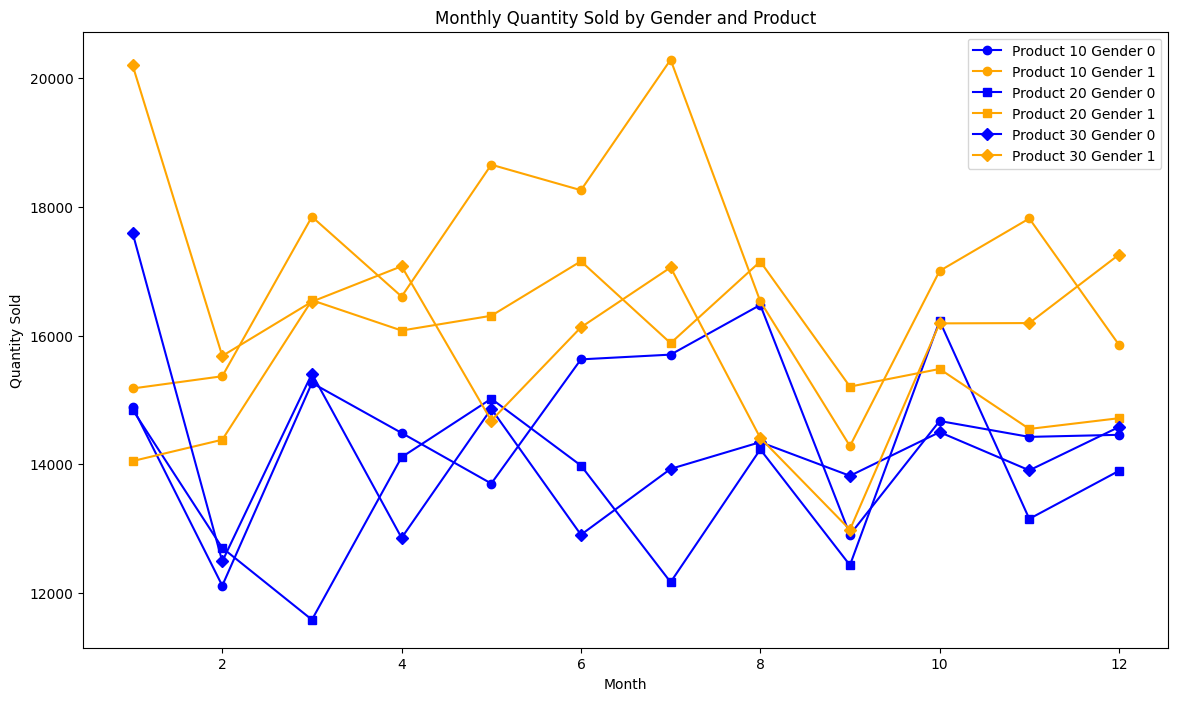

In [ ]:
# Plotting the data with separate colors and markers for both gender and product
plt.figure(figsize=(14, 8))

genders = gender_month_product_sales['gender'].unique()
products = gender_month_product_sales['product'].unique()

# Define markers for each product to differentiate
markers = {10: 'o', 20: 's', 30: 'D'}
colors = {0: 'blue', 1: 'orange'}  # Assuming 0 for male and 1 for female, can be adjusted as per data

# Plot for each product and gender
for product in products:
    for gender in genders:
        subset = gender_month_product_sales[(gender_month_product_sales['product'] == product) &
                                            (gender_month_product_sales['gender'] == gender)]
        plt.plot(subset['month'], subset['quantity'], marker=markers[product], linestyle='-', color=colors[gender],
                 label=f'Product {product} Gender {gender}')

# Adding a legend with custom labels
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())

plt.title('Monthly Quantity Sold by Gender and Product')
plt.xlabel('Month')
plt.ylabel('Quantity Sold')
plt.show()


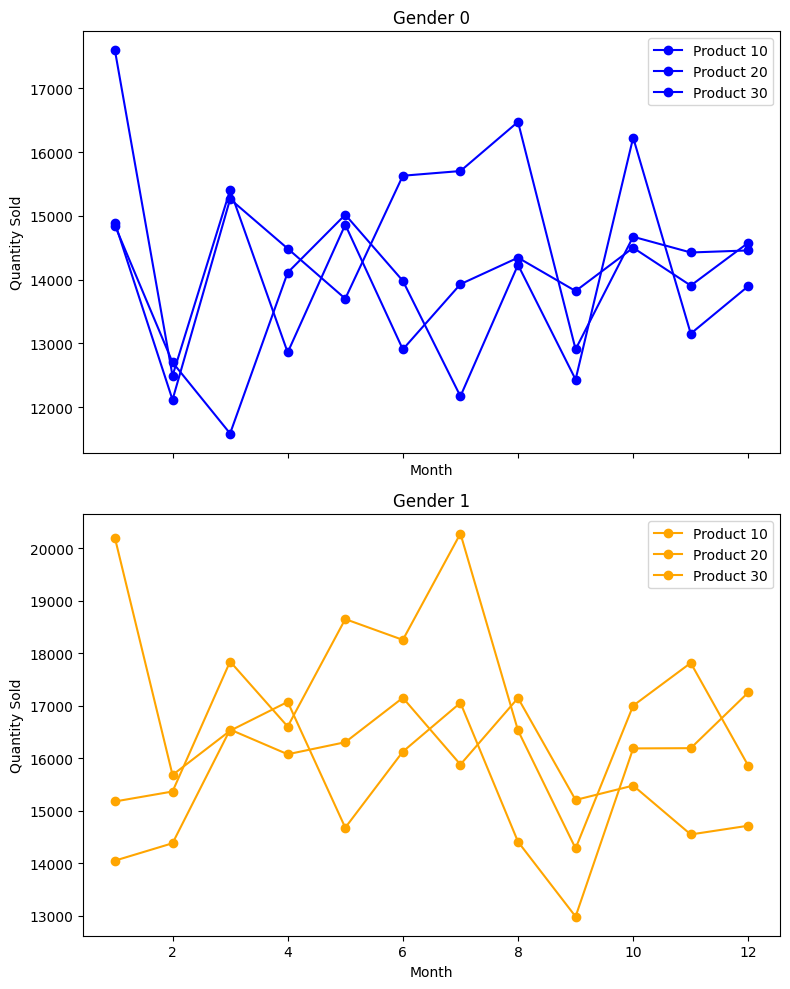

In [ ]:
# Plotting the data with separate plots for each gender
genders = gender_month_product_sales['gender'].unique()
products = gender_month_product_sales['product'].unique()
colors = {0: 'blue', 1: 'orange'}  # Assuming 0 for male and 1 for female, can be adjusted as per data

# Create subplots for each gender
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 10), sharex=True)

# Plot for each gender
for i, gender in enumerate(genders):
    ax = axes[i]
    for product in products:
        subset = gender_month_product_sales[(gender_month_product_sales['product'] == product) &
                                            (gender_month_product_sales['gender'] == gender)]
        ax.plot(subset['month'], subset['quantity'], marker='o', label=f'Product {product}', color=colors[gender])
    ax.set_title(f'Gender {gender}')
    ax.set_xlabel('Month')
    ax.set_ylabel('Quantity Sold')
    ax.legend()

plt.tight_layout()
plt.show()


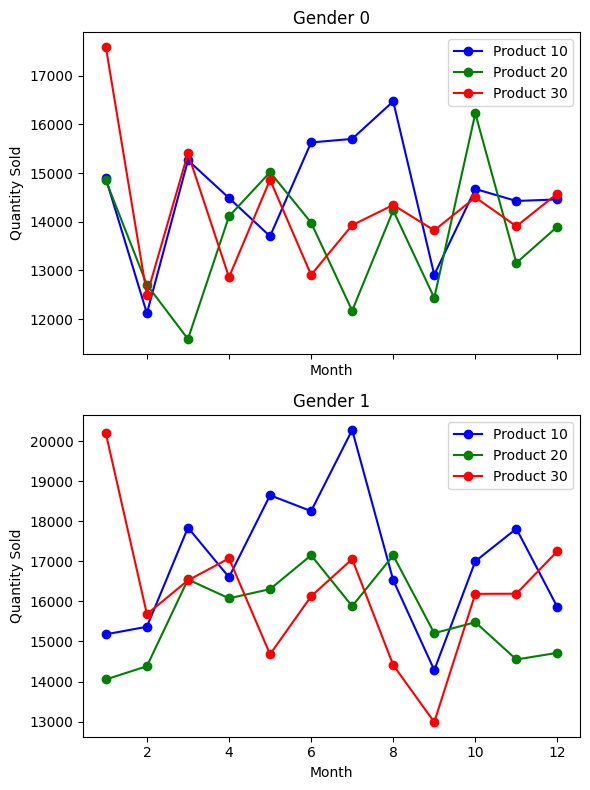

In [ ]:
# Plotting the data with separate plots for each gender and different colors for each product
genders = gender_month_product_sales['gender'].unique()
products = gender_month_product_sales['product'].unique()
product_colors = {10: 'blue', 20: 'green', 30: 'red'}  # Different colors for each product

# Create subplots for each gender
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(6, 8), sharex=True)

# Plot for each gender
for i, gender in enumerate(genders):
    ax = axes[i]
    for product in products:
        subset = gender_month_product_sales[(gender_month_product_sales['product'] == product) &
                                            (gender_month_product_sales['gender'] == gender)]
        ax.plot(subset['month'], subset['quantity'], marker='o', label=f'Product {product}', color=product_colors[product])
    ax.set_title(f'Gender {gender}')
    ax.set_xlabel('Month')
    ax.set_ylabel('Quantity Sold')
    ax.legend()

plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44552 (\N{HANGUL SYLLABLE GEUM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47785 (\N{HANGUL SYLLABLE MOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/

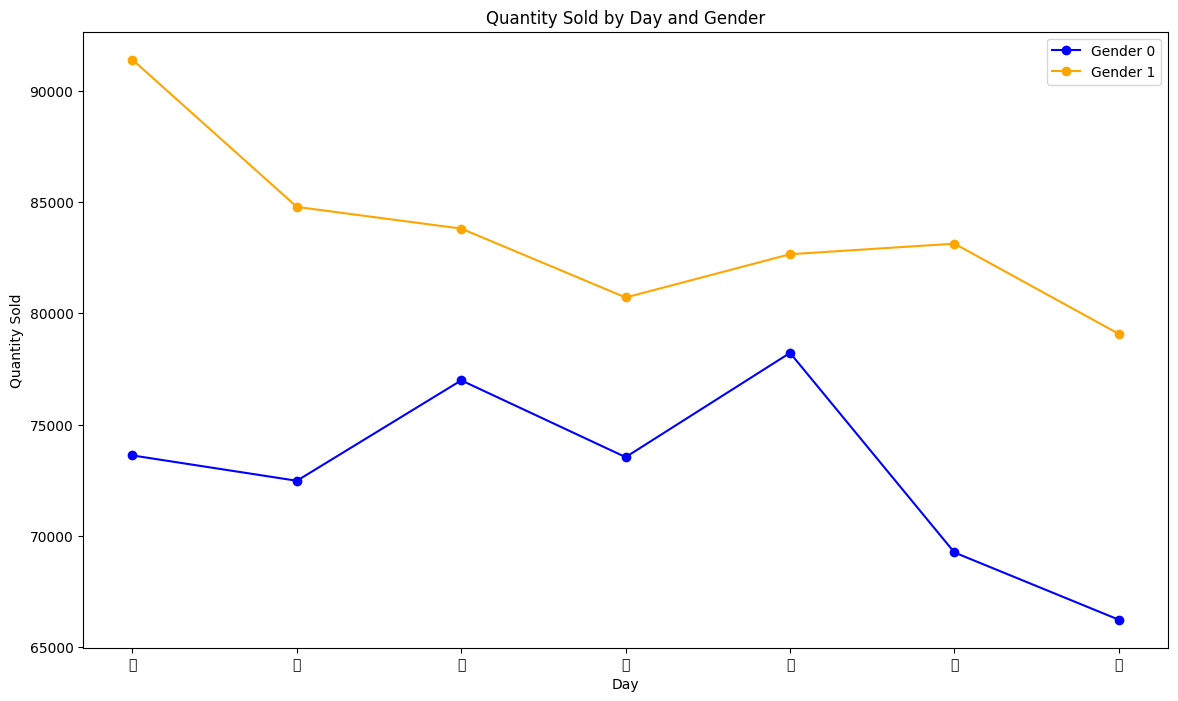

In [ ]:
#일별 성별 판매량

# Group by day and gender, then sum quantity
day_gender_sales = data.groupby(['day', 'gender'])[['quantity']].sum().reset_index()


# Plotting the data
plt.figure(figsize=(14, 8))

days = day_gender_sales['day'].unique()
genders = day_gender_sales['gender'].unique()

colors = {0: 'blue', 1: 'orange'}  # Assuming 0 for male and 1 for female, can be adjusted as per data

# Plot for each day and gender
for gender in genders:
    subset = day_gender_sales[day_gender_sales['gender'] == gender]
    plt.plot(subset['day'], subset['quantity'], marker='o', linestyle='-', color=colors[gender],
             label=f'Gender {gender}')

plt.title('Quantity Sold by Day and Gender')
plt.xlabel('Day')
plt.ylabel('Quantity Sold')
plt.legend()
plt.show()


In [ ]:
df = pd.read_csv('data_rev.csv')

In [ ]:
data = df

In [ ]:
# Parse the date column to datetime
data['date'] = pd.to_datetime(data['date'])

# Extract month and year from the date
data['month'] = data['date'].dt.month
data['year'] = data['date'].dt.year

# Group by product and month to get the sum of quantity
monthly_sales = data.groupby(['product', 'year', 'month'])['quantity'].sum().reset_index()

# Function to increase sales of product 10 in September by 20%
def increase_sales(product, month, increase_rate, sales_df):
    condition = (sales_df['product'] == product) & (sales_df['month'] == month)
    sales_df.loc[condition, 'quantity'] *= (1 + increase_rate)
    return sales_df

# Apply the function to increase sales of product 10 in September by 20%
monthly_sales = increase_sales(10, 9, 0.20, monthly_sales)


monthly_sales.head()


ModuleNotFoundError: No module named 'ace_tools'

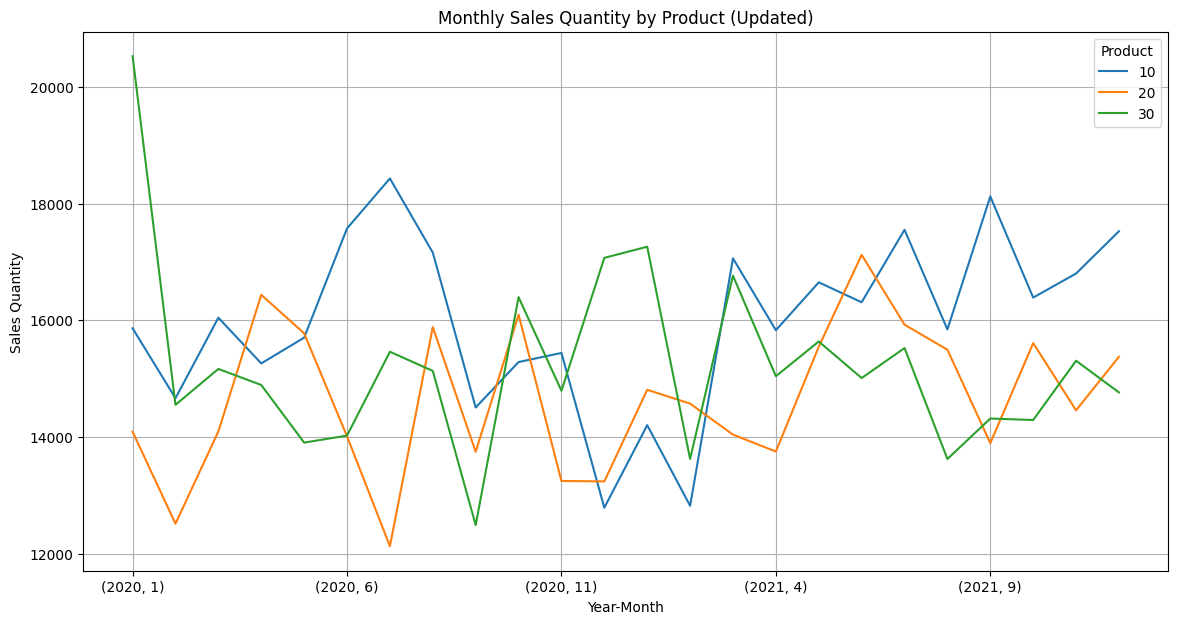

In [ ]:
# Function to increase sales of product 10 in September by 20% in the original dataframe
def increase_sales_original_df(product, month, increase_rate, df):
    condition = (df['product'] == product) & (df['date'].dt.month == month)
    df.loc[condition, 'quantity'] *= (1 + increase_rate)
    return df

# Apply the function to increase sales of product 10 in September by 20%
data = increase_sales_original_df(10, 9, 0.20, data)

# Group by product and month to get the sum of quantity for plotting
monthly_sales_updated = data.groupby(['product', 'year', 'month'])['quantity'].sum().reset_index()

# Pivot the data for plotting
pivot_sales_updated = monthly_sales_updated.pivot_table(index=['year', 'month'], columns='product', values='quantity', fill_value=0)

# Plot the updated data
pivot_sales_updated.plot(figsize=(14, 7))
plt.title('Monthly Sales Quantity by Product (Updated)')
plt.xlabel('Year-Month')
plt.ylabel('Sales Quantity')
plt.legend(title='Product')
plt.grid(True)
plt.show()


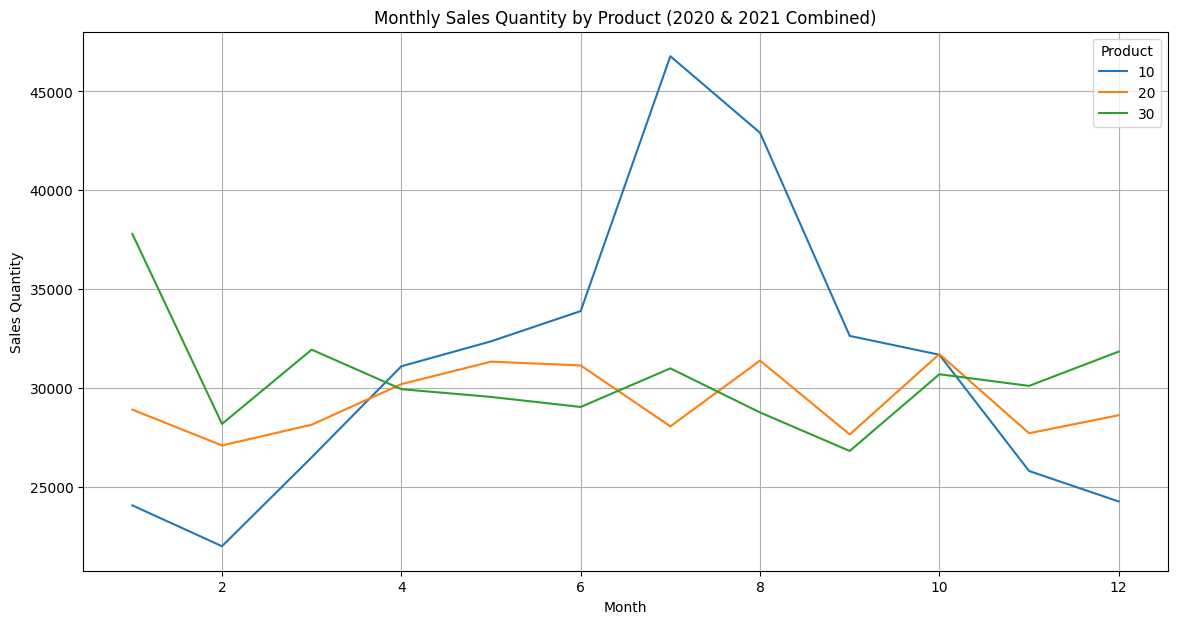

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
file_path_new = '/content/data_rev.csv'
data = pd.read_csv(file_path_new)

# Parse the date column to datetime
data['date'] = pd.to_datetime(data['date'])

# Extract month and year from the date
data['month'] = data['date'].dt.month
data['year'] = data['date'].dt.year

# Function to increase sales of product 10 in September by 20%
def increase_sales(product, month, increase_rate, df):
    condition = (df['product'] == product) & (df['date'].dt.month == month)
    df.loc[condition, 'quantity'] *= (1 + increase_rate)
    return df

# Apply the function to increase sales of product 10 in September by 20%
data = increase_sales(10, 9, 0.20, data)
data = increase_sales(10, 1, -0.20, data)
data = increase_sales(10, 2, -0.20, data)
data = increase_sales(10, 3, -0.20, data)
data = increase_sales(10, 7, 0.30, data)
data = increase_sales(10, 8, 0.30, data)
data = increase_sales(10, 11, -0.20, data)
data = increase_sales(10, 12, -0.20, data)

# Group by product and month to get the sum of quantity for plotting
monthly_sales_combined = data.groupby(['product', 'month'])['quantity'].sum().reset_index()

# Pivot the data for plotting
pivot_monthly_sales_combined = monthly_sales_combined.pivot_table(index='month', columns='product', values='quantity', fill_value=0)

data['amount'] = data['price'] * data['quantity']

# Plot the updated data
pivot_monthly_sales_combined.plot(figsize=(14, 7))
plt.title('Monthly Sales Quantity by Product (2020 & 2021 Combined)')
plt.xlabel('Month')
plt.ylabel('Sales Quantity')
plt.legend(title='Product')
plt.grid(True)
plt.show()


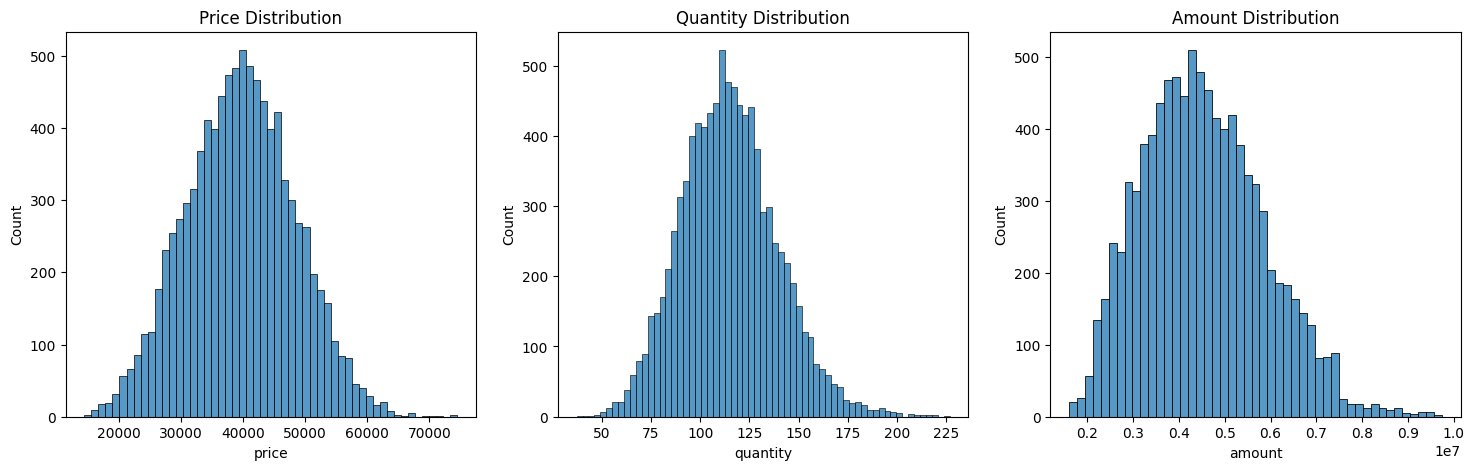

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, f_oneway

# 가격, 구매 수량, 총 구매 금액 분포 시각화
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(data['price'], ax=axes[0])
axes[0].set_title('Price Distribution')

sns.histplot(data['quantity'], ax=axes[1])
axes[1].set_title('Quantity Distribution')

sns.histplot(data['amount'], ax=axes[2])
axes[2].set_title('Amount Distribution')

plt.show()